# Installiation

In [ ]:
# Install Faker
!pip install Faker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 20.0 MB/s eta 0:00:00


# packages

In [ ]:
#import Libraries
import numpy as np
import time
from sklearn.preprocessing import StandardScaler , MinMaxScaler
import pandas as pd
import random as rd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from sklearn.pipeline import Pipeline
from keras.layers import Dense
import json
import re
import seaborn as sns
import string
from faker import Faker
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
import unicodedata
from sklearn.model_selection import train_test_split
import faker
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from datetime import datetime # for Parsing problem in Faker data_between

# Create Dataset

In [ ]:
# Intialiaze Faker
fake = Faker()

# for repoductivity
np.random.seed(0)

# N.records
record_num = 100000

# Study Date
date_start = datetime.strptime("2019-11-01", "%Y-%m-%d")
date_end = datetime.strptime("2020-12-31", "%Y-%m-%d")

In [ ]:
# Faker function to create fake data
def fake_data(kind):
  data = []
  if kind == "date" :
    for i in range(record_num) :
       data.append(fake.date_between(start_date=date_start, end_date=date_end).strftime("%Y-%m-%d"))
  elif kind == "country" :
    for i in range(record_num) :
      data.append(fake.country())
  return data

In [ ]:
date = fake_data("date")
country = fake_data("country")

In [ ]:
# Make sure has same lenght of record number
assert(len(date)) == record_num

In [ ]:
# Make sure has same lenght of record number
assert(len(country)) == record_num

In [ ]:
# create dataset

"""
All  Ranges based on my own research (Not accurate)

Wind speed 0 : 15
Temperature -10 : 40
Humditiy 20:90
NO2  10 : 25
PM2.5(particulate_matters)   5:55
Solar  radiation 100 : 280

"""
data = {
"Idx"  : [idx for idx in range(record_num)] , # record numbers
"Date" : date , # Date of study
"Temperature" :np.random.uniform(-10, 40, size=record_num),
"Wind_Speed" : np.random.uniform(0, 15, size=record_num) ,
"Country" : country  ,
"NO2" : np.random.uniform(10, 45, size=record_num)  ,
"PM" : np.random.uniform(5, 55, size=record_num) ,
"Humidity" : np.random.uniform(20, 90, size=record_num) ,
"Solar_Radiation" : np.random.uniform(100, 280, size=record_num)
}

In [ ]:
# turn our data to DataFrame
data =  pd.DataFrame(data)
data.head()

Idx        Date  Temperature  Wind_Speed                   Country  \
0    0  2019-11-30    33.328106    3.010642            United Kingdom   
1    1  2020-05-13    33.125774   10.752186  Central African Republic   
2    2  2020-02-24     0.297037    6.859700                 Mauritius   
3    3  2020-01-15    10.960061   11.840218          Saint Barthelemy   
4    4  2020-08-31    21.675369    9.378482             Liechtenstein   

         NO2         PM   Humidity  Solar_Radiation  
0  43.468433   6.541317  76.564142       119.457428  
1  25.657381  13.837978  32.657343       102.754739  
2  29.816785   8.319394  79.878807       204.115043  
3  31.960168  31.930332  39.575516       156.716043  
4  25.672951  32.498525  86.901223       173.499974

In [ ]:
# Add the Impact  Score column to the DataFrame
data["Impact_Score"] = data["PM"]*0.3 + data["NO2"]*0.2 + (40-data["Temperature"])*0.2 + (90-data["Humidity"])*0.1 + (280-data["Solar_Radiation"])*0.2 + (15-data["Wind_Speed"])*0.1

# EDA

# Basic Data Information

In [ ]:
# Show the head of the DataFrame
data.head()

Idx        Date  Temperature  Wind_Speed                   Country  \
0    0  2020-12-26    17.440675    8.028856  United States of America   
1    1  2020-08-27    25.759468   13.560664                  Paraguay   
2    2  2020-03-16    20.138169    7.535949                  Maldives   
3    3  2020-08-26    17.244159    1.513050                 Australia   
4    4  2019-11-05    11.182740    7.913730                     Aruba   

         NO2         PM   Humidity  Solar_Radiation  Impact_Score  
0  17.621945  43.280225  20.001553       187.905366     47.136208  
1  30.553740   7.526819  57.842298       161.148912     38.346822  
2  44.566466  54.877242  26.916358       248.271933     42.749215  
3  43.280347   8.383612  58.001957       277.104192     20.849982  
4  22.004002  15.473281  45.830570       233.637633     29.204280

In [ ]:
data.tail()

Idx        Date  Temperature  Wind_Speed     Country        NO2  \
99995  99995  2020-05-06    26.296054    5.529946     Armenia  23.904430   
99996  99996  2020-01-12    15.376025    4.576094        Iran  22.047405   
99997  99997  2020-03-20    30.506642    3.219367     Estonia  31.621998   
99998  99998  2020-11-02    17.551614    4.436649  Micronesia  21.757844   
99999  99999  2020-06-06     1.287793   12.637563        Togo  30.278367   

              PM   Humidity  Solar_Radiation  Impact_Score  
99995   5.530396  77.599948       225.655810     22.236642  
99996   8.861386  85.382933       107.274565     48.041876  
99997  46.596870  57.325172       235.947180     35.458242  
99998  17.127809  81.656996       138.488488     44.172527  
99999   8.635335  38.593192       230.705833     31.624473

In [ ]:
# Describe each column in dataset
data.describe()

Idx    Temperature     Wind_Speed            NO2  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean    49999.500000      14.975002       7.534255      27.425223   
std     28867.657797      14.451882       4.330515      10.107426   
min         0.000000      -9.999834       0.000203      10.000103   
25%     24999.750000       2.402289       3.780546      18.626651   
50%     49999.500000      14.966053       7.565197      27.425103   
75%     74999.250000      27.493835      11.298505      36.167646   
max     99999.000000      39.998898      14.999985      44.999804   

                  PM       Humidity  Solar_Radiation   Impact_Score  
count  100000.000000  100000.000000    100000.000000  100000.000000  
mean       29.929568      55.058041       190.089682      41.691749  
std        14.444110      20.176920        52.024070      12.006617  
min         5.001041      20.000423       100.000240       5.581388  
25%        17.410577      37.638200       145.064346      32.493571  
50%        29.880586      55.124098       190.311037      41.660978  
75%        42.411782      72.569350       235.267524      50.875132  
max        54.998099      89.999616       279.998092      76.750213

In [ ]:
# Show the information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Idx              100000 non-null  int64  
 1   Date             100000 non-null  object 
 2   Temperature      100000 non-null  float64
 3   Wind_Speed       100000 non-null  float64
 4   Country          100000 non-null  object 
 5   NO2              100000 non-null  float64
 6   PM               100000 non-null  float64
 7   Humidity         100000 non-null  float64
 8   Solar_Radiation  100000 non-null  float64
 9   Impact_Score     100000 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 7.6+ MB


In [ ]:
# Check for missing values
print(data.isnull().sum())

Idx                0
Date               0
Temperature        0
Wind_Speed         0
Country            0
NO2                0
PM                 0
Humidity           0
Solar_Radiation    0
Impact_Score       0
dtype: int64


# Data Visualization

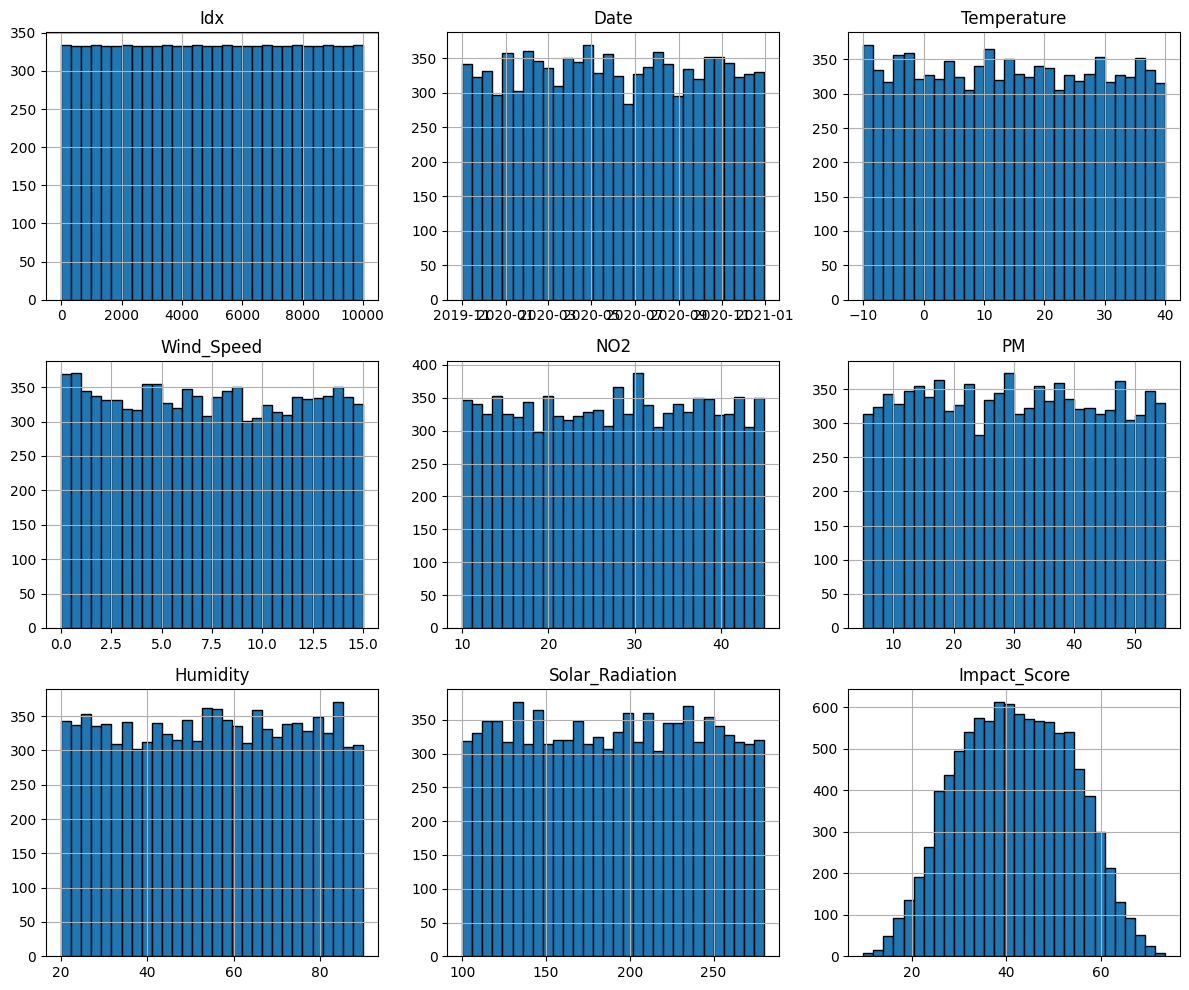

In [ ]:
# Histograms for each numerical feature
data.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()



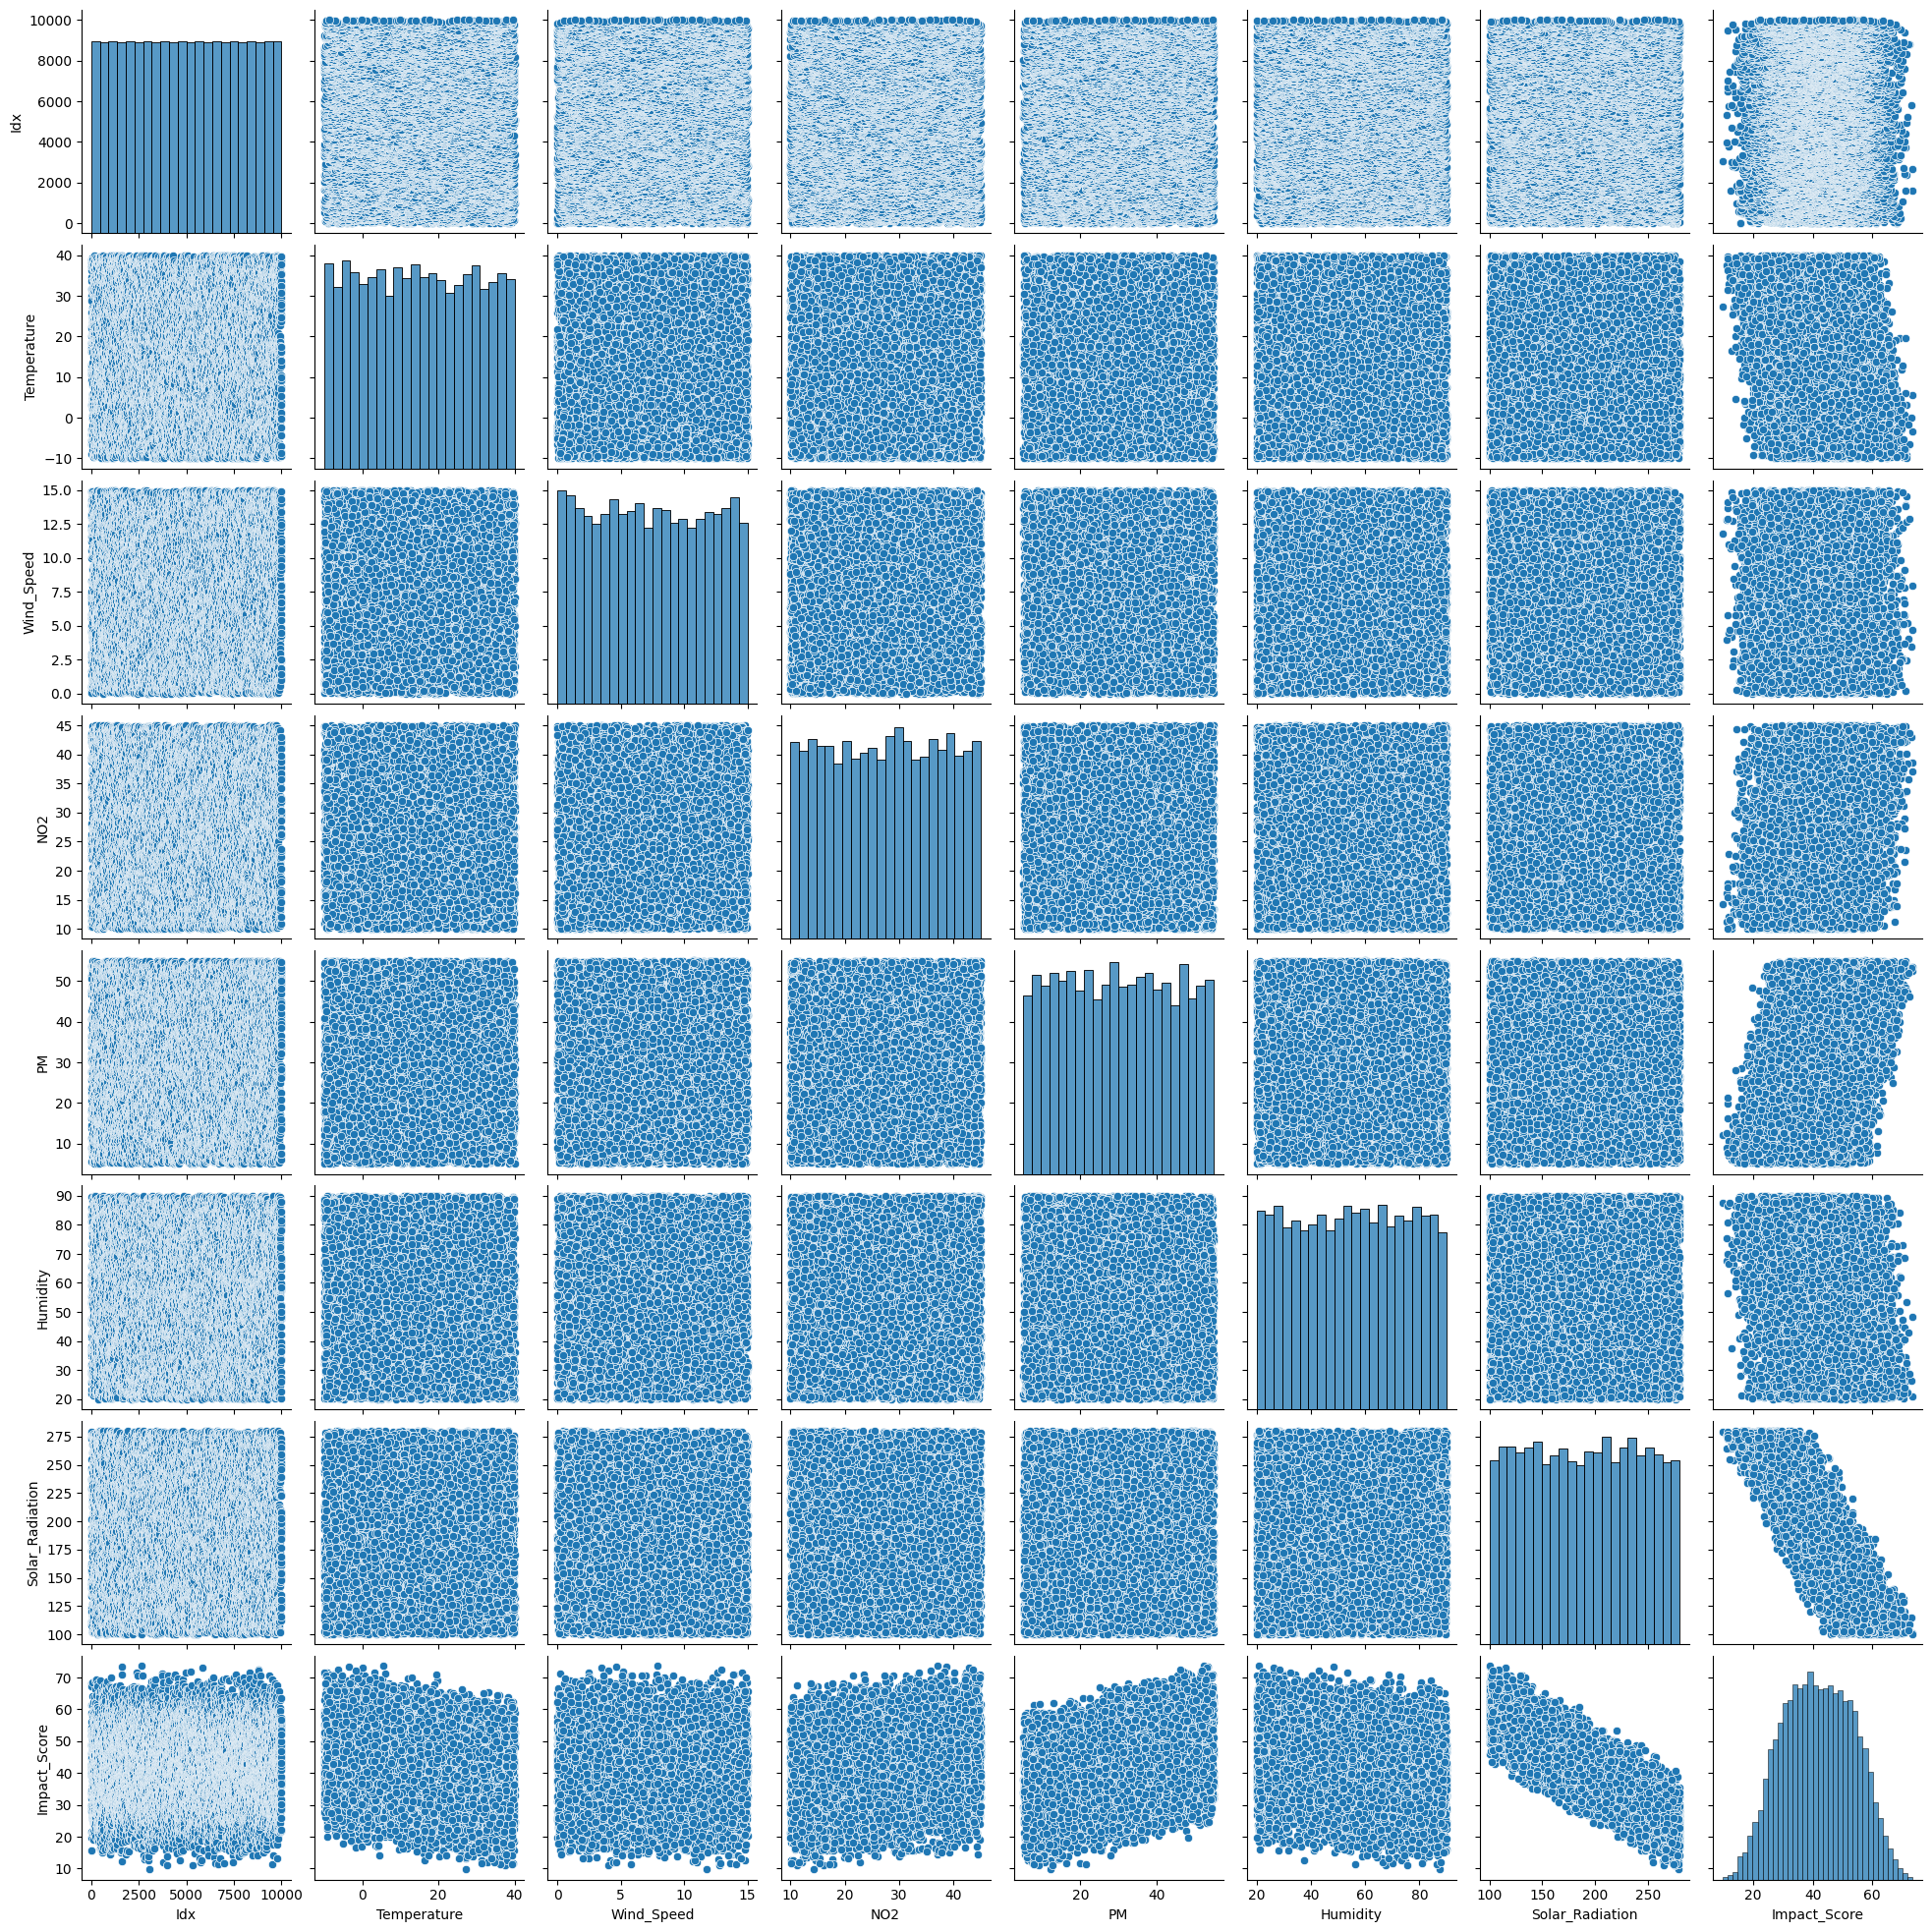

In [ ]:
# Visualize relationships between numerical features
sns.pairplot(data)
plt.show()


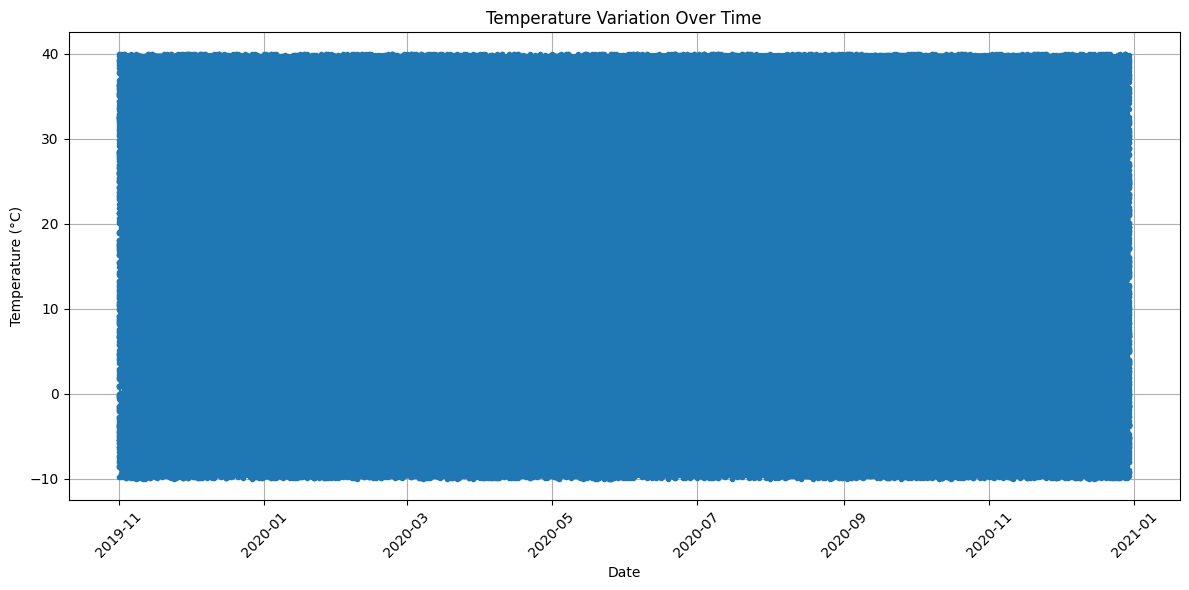

In [ ]:
# Convert 'Date' column to datetime type
data['Date'] = pd.to_datetime(data['Date'])

# Time series plot for a Temperature parameter
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Temperature'], marker='.', linestyle='-')
plt.title('Temperature Variation Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

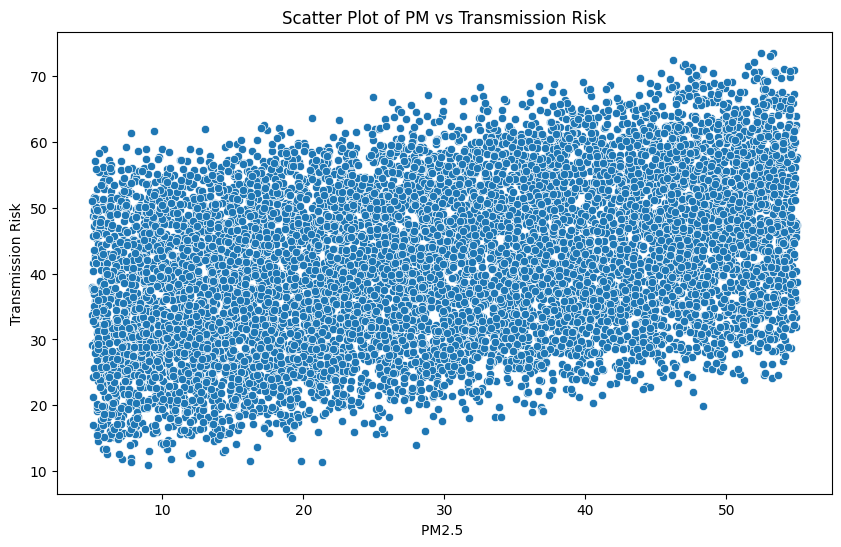

In [ ]:
# Scatter plot between PM2.5 and Transmission Risk
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['PM'], y=data['Impact_Score'])
plt.title('Scatter Plot of PM vs Transmission Risk')
plt.xlabel('PM2.5 ')
plt.ylabel('Transmission Risk (Impact Score)')
plt.show()


In [ ]:
# Count values of Country
data['Country'].value_counts()

Country
Korea           84
Congo           84
Mayotte         56
Burkina Faso    55
Bahrain         55
                ..
Cyprus          29
Saint Helena    29
Tonga           27
Palau           26
Honduras        25
Name: count, Length: 243, dtype: int64

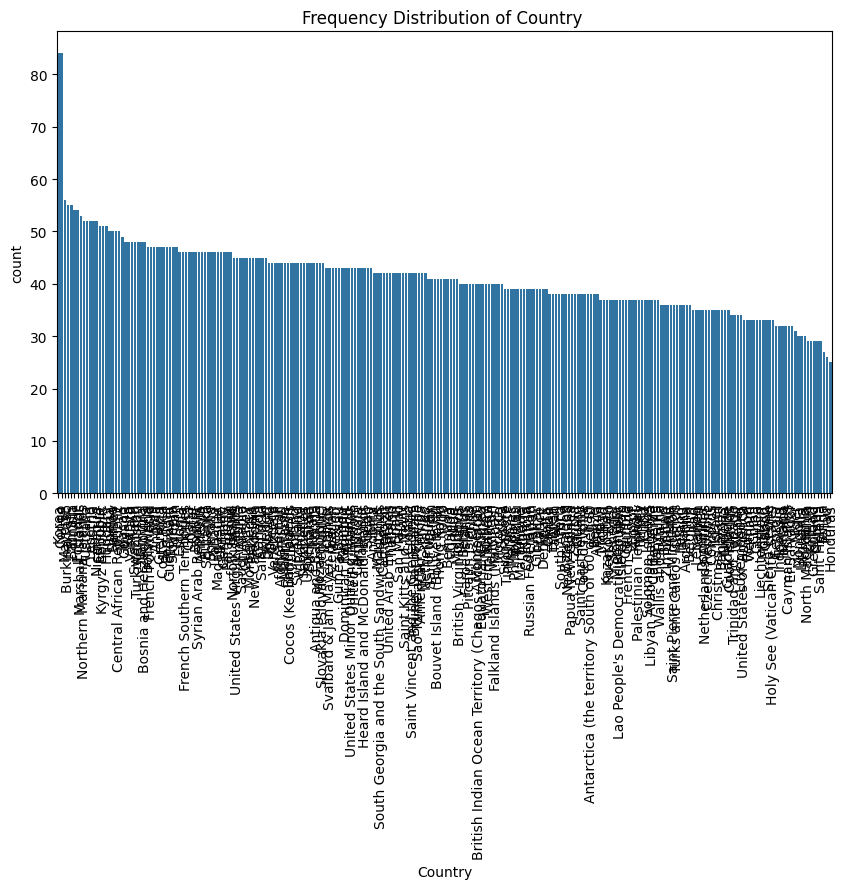

In [ ]:
# Plot the frequency distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Country', order=data['Country'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Frequency Distribution of Country ')
plt.show()


# Preprocessing

# Split Dataset  & Cleaning

In [ ]:
# Remove unimportant Columns
X = data.drop(["Date", "Country",'Idx'], axis=1)

# Remove  Target Column
X =  X.drop(["Impact_Score"], axis=1)

# define our target column
y = data["Impact_Score"]

In [ ]:
#Split our dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Rescalling our Input


In [ ]:
# Scalling all Columns
std = StandardScaler()
#min_max =  MinMaxScaler()

In [ ]:
X_train_scalled = std.fit_transform(X_train)

In [ ]:
X_test_scalled = std.transform(X_test)

# Build the model

In [ ]:
# Build our model
reg = LinearRegression()

# test model
reg.fit(X_train_scalled, y_train)

LinearRegression()

In [ ]:
# Print the coefficients of the model
print(reg.coef_)

[ -2.89043744  -0.43276577   2.02018442   4.3339376   -2.01993551
 -10.40715556]


# Evaluation

In [ ]:
# Score of train dataset
reg.score(X_train_scalled, y_train)

1.0

In [ ]:
# Score of test dataset
reg.score(X_test_scalled, y_test)

1.0

In [ ]:
# Evulate our model on Traiin dataset make sure no overfitting
mean_squared_error(reg.predict(X_train_scalled),y_train)

1.163995918697425e-28

In [ ]:
# Evulate our model on Test Dataset
mean_squared_error(reg.predict(X_test_scalled),y_test)

1.1659269515857928e-28

In [ ]:
# Show r2_score of the model
r2_score(y_test, reg.predict(X_test_scalled))

1.0

# Comparing different models

In [ ]:
# Define our models

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(1.0),
    'Lasso Regression': Lasso(0.1),
    'Random Forest': RandomForestRegressor(n_estimators=10, random_state=0),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=10, random_state=0),
    'Support Vector Regressor': SVR(kernel='rbf', C=1.0, epsilon=0.1)
}

In [ ]:
# Train each model and Evualte it

results = {}
for name, model in models.items():
    start = time.time()
    model.fit(X_train_scalled, y_train)
    end = time.time()
    y_pred = model.predict(X_test_scalled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    # Store the results
    results[name] = {'MSE': mse, 'R²': r2, "Time" : end-start}

In [ ]:
# Turn the results into dataframs
results =  pd.DataFrame(results).T

<ipython-input-46-c62c4bb993d9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results.index, y="MSE", data=results, palette="viridis")


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Linear Regression'),
  Text(1, 0, 'Ridge Regression'),
  Text(2, 0, 'Lasso Regression'),
  Text(3, 0, 'Random Forest'),
  Text(4, 0, 'Gradient Boosting'),
  Text(5, 0, 'Support Vector Regressor')])

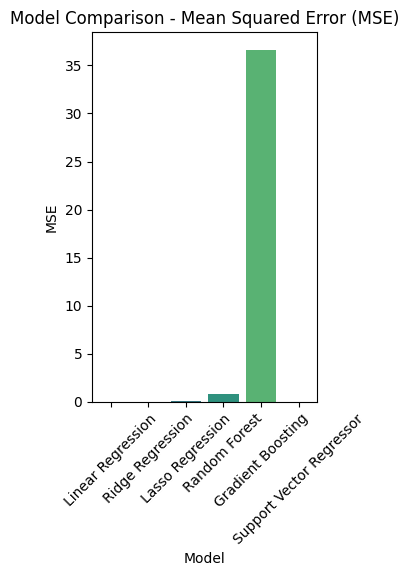

In [ ]:
# Plot Mean Squared Error (MSE)
plt.subplot(1, 2, 1)
sns.barplot(x=results.index, y="MSE", data=results, palette="viridis")
plt.title('Model Comparison - Mean Squared Error (MSE)')
plt.xlabel('Model')
plt.ylabel('MSE')
plt.xticks(rotation=45)

In [ ]:
#Head of result
results.head()

MSE        R²       Time
Linear Regression  1.165927e-28  1.000000   0.047227
Ridge Regression   2.257847e-08  1.000000   0.022910
Lasso Regression   6.003754e-02  0.999586   0.025567
Random Forest      8.086326e-01  0.994418  11.091481
Gradient Boosting  3.663204e+01  0.747136   2.659681

# Build the pipline

In [ ]:
# Define our pipline
pipeline = Pipeline([
    ('scaler', std),
    ('classifier', reg)
])

In [ ]:
# test the pibline
pipeline.score(X_test, y_test)

1.0